In [8]:
import torch
import os

os.environ['CUDA_LAUNCH_BLOCKING'] = '0'
device = 'cuda' if torch.cuda.is_available() else 'cpu'
print(device)

cuda


In [22]:
# from google.colab import drive
# drive.mount('/content/drive')

# root_dir = os.path.join('/content/drive', 'My Drive', 'UCR', '2-2024', 'InvCC', 'ADHD200', 'Datasets', 'preprocessed')

import os

root_dir = os.path.join('data', 'preprocessed')

tdc_dir = os.path.join(root_dir, 'TDC')
adhd_dir = os.path.join(root_dir, 'ADHD')

# To save autoencoder state dict
save_path = os.path.join(root_dir, 'autoencoder.pt')

# Recursively find all .nii.gz files in TDC and ADHD folders
tdc_file_paths = [
    os.path.join(root, file)
    for root, _, files in os.walk(tdc_dir)
    for file in files if file.endswith('.nii.gz')
]

adhd_file_paths = [
    os.path.join(root, file)
    for root, _, files in os.walk(adhd_dir)
    for file in files if file.endswith('.nii.gz')
]

# Adding labels
tdc_labels = [0] * len(tdc_file_paths)
adhd_labels = [1] * len(adhd_file_paths)

file_paths = tdc_file_paths + adhd_file_paths
labels = tdc_labels + adhd_labels

In [23]:
import os

# Function to recursively find all .nii.gz files in a directory
def find_nii_files(root_dir):
    nii_files = []
    for dirpath, _, filenames in os.walk(root_dir):
        for file in filenames:
            if file.endswith('.nii.gz'):
                nii_files.append(os.path.join(dirpath, file))
    return nii_files

In [18]:
import nibabel as nib
import numpy as np
import os
import pandas as pd

# Function to load and extract statistics for all fMRI data in given paths
def get_fmri_stats(file_paths):
    stats = []
    for path in file_paths:
        img = nib.load(path)
        data = img.get_fdata()

        # Extract shape, mean, standard deviation, min, and max intensity values
        stats.append({
            'File': os.path.basename(path),
            'Shape': data.shape,
            'Mean Intensity': np.mean(data),
            'Std Intensity': np.std(data),
            'Min Intensity': np.min(data),
            'Max Intensity': np.max(data)
        })
    return pd.DataFrame(stats)

# Get statistics for all files in both TDC and ADHD
tdc_stats = get_fmri_stats(tdc_file_paths)
adhd_stats = get_fmri_stats(adhd_file_paths)

# Display statistics for review
print("TDC Statistics:\n", tdc_stats)
print("\nADHD Statistics:\n", adhd_stats)

TDC Statistics:
                                                    File         Shape  \
0     DegreeCentrality_PositiveBinarizedSumBrainMap_...  (61, 73, 61)   
1              zVMHCMap_ADHD200_Peking_2_1117299.nii.gz  (61, 73, 61)   
2               ALFFMap_ADHD200_Peking_2_1117299.nii.gz  (61, 73, 61)   
3               ReHoMap_ADHD200_Peking_2_1117299.nii.gz  (61, 73, 61)   
4     DegreeCentrality_PositiveWeightedSumBrainMap_A...  (61, 73, 61)   
...                                                 ...           ...   
3181           fALFFMap_ADHD200_Peking_1_4053836.nii.gz  (61, 73, 61)   
3182  DegreeCentrality_PositiveBinarizedSumBrainMap_...  (61, 73, 61)   
3183            ReHoMap_ADHD200_Peking_1_4053836.nii.gz  (61, 73, 61)   
3184           zVMHCMap_ADHD200_Peking_1_4053836.nii.gz  (61, 73, 61)   
3185            ALFFMap_ADHD200_Peking_1_4053836.nii.gz  (61, 73, 61)   

      Mean Intensity  Std Intensity  Min Intensity  Max Intensity  
0         591.252918    1154.916445   

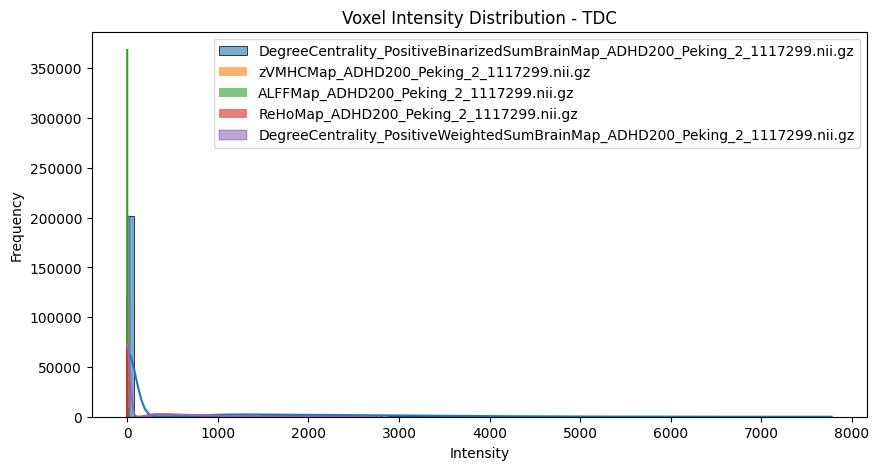

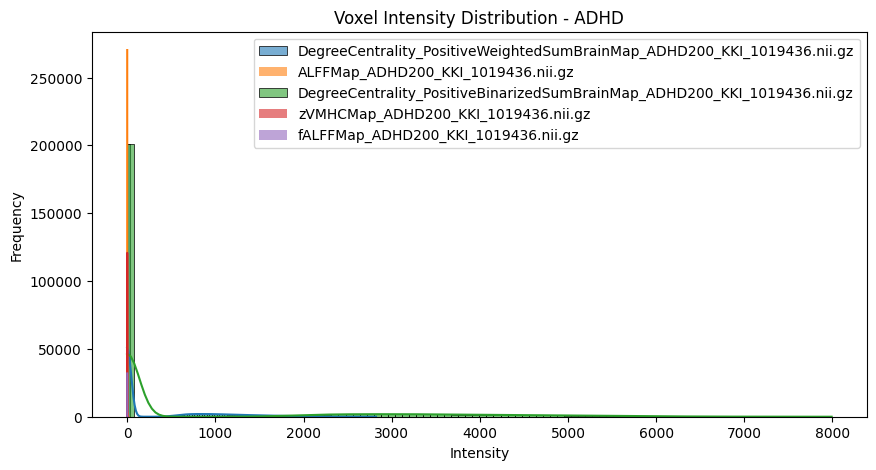

In [25]:
import os
import matplotlib.pyplot as plt
import seaborn as sns
import nibabel as nib
import pandas as pd

# Function to recursively find all .nii.gz files in a directory
def find_nii_files(root_dir):
    nii_files = []
    for dirpath, _, filenames in os.walk(root_dir):
        for file in filenames:
            if file.endswith('.nii.gz'):
                nii_files.append(os.path.join(dirpath, file))
    return nii_files

# Function to load and extract basic statistics for fMRI data
def get_fmri_stats(file_paths, sample_size=5):
    stats = []
    for path in file_paths[:sample_size]:  # Limit for faster EDA
        img = nib.load(path)
        data = img.get_fdata()

        # Shape, mean, and standard deviation
        stats.append({
            'File': os.path.basename(path),
            'Path': path,  # Include the full path
            'Shape': data.shape,
            'Mean Intensity': data.mean(),
            'Std Intensity': data.std(),
            'Min Intensity': data.min(),
            'Max Intensity': data.max()
        })
    return pd.DataFrame(stats)

# Plot intensity histograms for each group
def plot_intensity_histograms(stats, group_name):
    plt.figure(figsize=(10, 5))
    for _, row in stats.iterrows():
        img = nib.load(row['Path'])
        data = img.get_fdata()
        sns.histplot(data.flatten(), bins=100, kde=True, label=row['File'], alpha=0.6)
    plt.title(f'Voxel Intensity Distribution - {group_name}')
    plt.xlabel('Intensity')
    plt.ylabel('Frequency')
    plt.legend()
    plt.show()

# Define root directories for TDC and ADHD groups
root_dir = os.path.join('data', 'preprocessed')
tdc_dir = os.path.join(root_dir, 'TDC')
adhd_dir = os.path.join(root_dir, 'ADHD')

# Find all .nii.gz files and get their statistics
tdc_file_paths = find_nii_files(tdc_dir)
adhd_file_paths = find_nii_files(adhd_dir)

tdc_stats = get_fmri_stats(tdc_file_paths)
adhd_stats = get_fmri_stats(adhd_file_paths)

# Plot histograms for TDC and ADHD groups
plot_intensity_histograms(tdc_stats, 'TDC')
plot_intensity_histograms(adhd_stats, 'ADHD')

In [26]:
# Summary statistics for group comparison
print("TDC - Mean Voxel Intensity:", tdc_stats['Mean Intensity'].mean())
print("ADHD - Mean Voxel Intensity:", adhd_stats['Mean Intensity'].mean())

TDC - Mean Voxel Intensity: 155.3528799612251
ADHD - Mean Voxel Intensity: 246.81015998911303


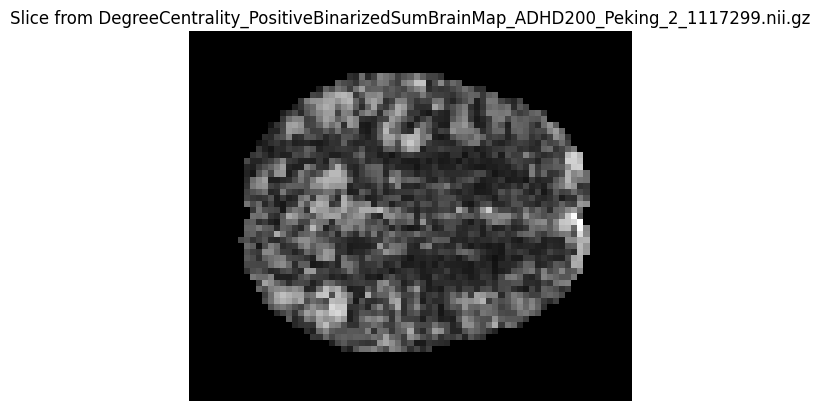

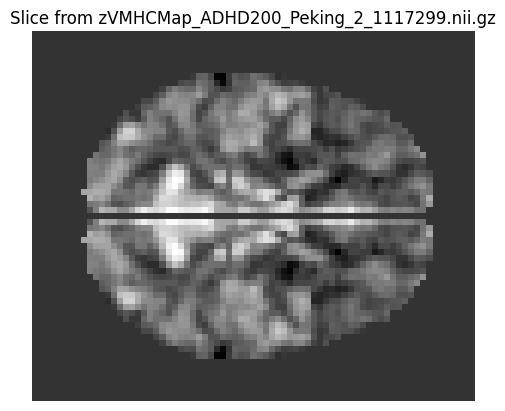

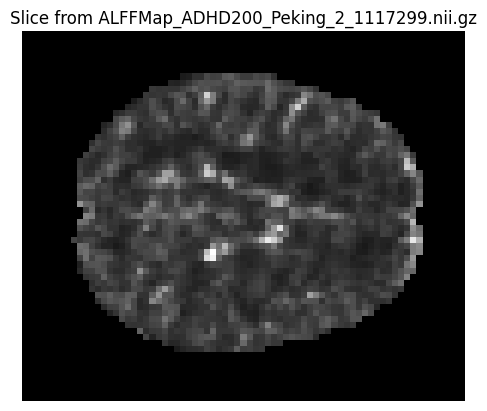

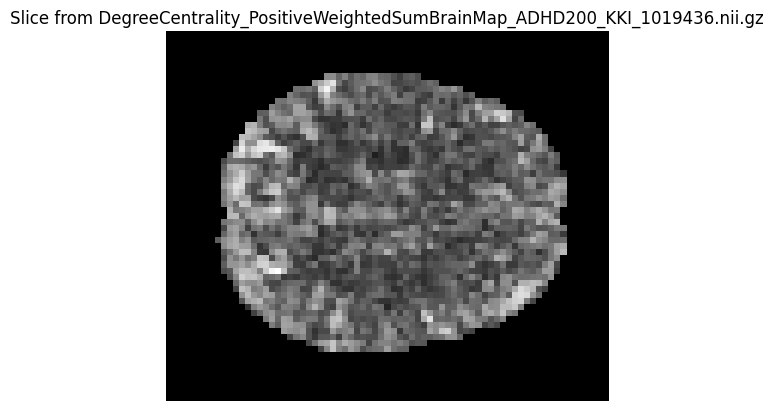

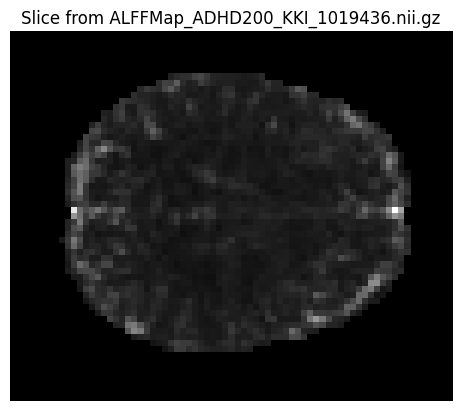

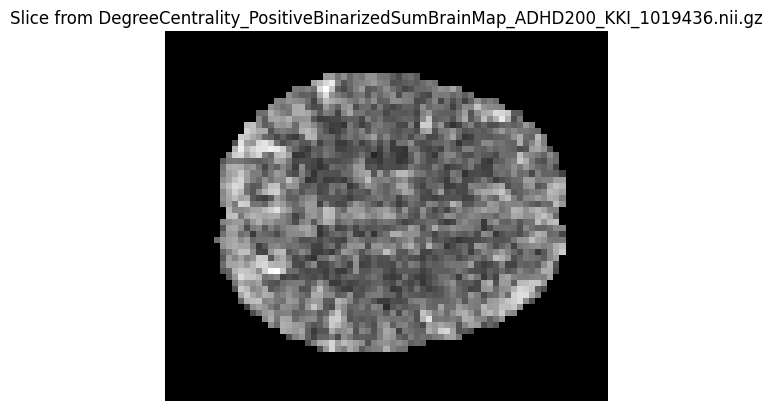

In [27]:
# Visualize a few sample slices
def visualize_sample_slices(file_paths, n_samples=3):
    for path in file_paths[:n_samples]:
        img = nib.load(path)
        data = img.get_fdata()
        
        # Show the middle slice
        slice_idx = data.shape[2] // 2  # Middle slice along the z-axis
        plt.imshow(data[:, :, slice_idx], cmap='gray')
        plt.title(f'Slice from {os.path.basename(path)}')
        plt.axis('off')
        plt.show()

# View samples from both TDC and ADHD
visualize_sample_slices(tdc_file_paths)
visualize_sample_slices(adhd_file_paths)